
# BDA300/Assignment 
## Bank Marketing  Case Study
### Data cleaning and preparation
The head of Marketing wants to know which customers have the highest propensity for buying a Certificate of Deposit (CD) from the institution. 


 1. Data loading and merging [15pts]
 2. Categorical variables [15pts]
 3. Numerical variables [35pts]
 4. apply, split-apply-combine [35pts]
    
  Total :  100pts


### <b> 1. Data loading and merging [15pts]

#### <b>  1.1. Load customer_demographics into a dataframe. [5pts]
 
    Lowercase all column names. [4pts]
    show the first 5 rows and the list of columns and their types.[1pt]

In [6]:
'''
Overview:
The assignment is based on a Banking Marketing case study, where the goal is to prepare and explorecustomer data
so that marketing can later identify which customers are good targets for a Certificate of Deposit (CD) prodect.

Datasets:
- First shows us the demographic info like education, age, marital status and job.
- Second shows us the info like balance, default status, housing loan, personal loan.
'''
import pandas as pd
customerdemo = pd.read_csv('customer_demographics.csv')
customerdemo.columns = customerdemo.columns.str.lower()
#Basically a peek into the dataframe to see the features, structure & if the data loaded correctly.
customerdemo.head()

,education,customer_id,age,marital,job
0,secondary,100103,33.0,married,entrepreneur
1,tertiary,100106,35.0,married,management
2,primary,100118,57.0,married,blue-collar
3,primary,100119,60.0,married,retired
4,secondary,100121,28.0,married,blue-collar


In [7]:
#Inspecting the features of the dataframe to identify the numerical and catagorical variables.
customerdemo.dtypes

education       object
customer_id      int64
age            float64
marital         object
job             object
dtype: object

#### <b> 1.2. Load customer_banking_info into a dataframe. [5pts]

    change the column name customer_id1 to customer_id. [4pts]
    show the first 5 rows and the list of columns and their types.[1pt]

In [8]:
customerbanking = pd.read_csv('customer_banking_info.csv')
customerbanking = customerbanking.rename(columns = {'customer_id1':'customer_id'})
#Basically did the same thing but corrected the mismatches in the names of the features.
customerbanking.head()

,customer_id,default,balance,housing,loan
0,122482,no,347,no,no
1,119725,no,3462,no,no
2,103490,no,157,yes,no
3,126218,no,3689,yes,no
4,104835,no,0,yes,yes


In [9]:
customerbanking.dtypes

customer_id     int64
default        object
balance         int64
housing        object
loan           object
dtype: object

 #### <b> 1.3. Merging [5pts]

Merge the two dataframes into one unified dataframe named bank. show the first 5 rows of the new dataframe and the column names and their types. 
    

In [10]:
bank = customerdemo.merge(customerbanking, right_on = 'customer_id',left_on = 'customer_id')
bank.head()
#Goal: Keep only those customer_id's that exist in both the dataframes.
#inner join: We are using inner join only because we want the details of the customers who appear on both the tables.
#An inner join gives you exactly that set and drops the "orphan" rows that would become just half-empty records.

,education,customer_id,age,marital,job,default,balance,housing,loan
0,secondary,100103,33.0,married,entrepreneur,no,2,yes,yes
1,tertiary,100106,35.0,married,management,no,231,yes,no
2,primary,100118,57.0,married,blue-collar,no,52,yes,no
3,primary,100119,60.0,married,retired,no,60,yes,no
4,secondary,100121,28.0,married,blue-collar,no,723,yes,yes


In [ ]:
'''
Questions about other join (What would happen with other joins):
-Left Join: Keeps all info from the customer demographic. Can end up with customer demographic with no banking info.
-Right Join: Same issue but from different direction. 
-Outer Join: Keeps everything. Can cause the most amount of missing data.
Overall inner join makes a better unified dataset.
'''

In [11]:
bank.dtypes

education       object
customer_id      int64
age            float64
marital         object
job             object
default         object
balance          int64
housing         object
loan            object
dtype: object

### <b> 2. Categorical variables [15pts]

#### <b> 2.1. Examine the variable 'marital'. [10pts]

    a. lowercase all values under marital column. [5pts] 
    show the frequency table before and after the change. 
    

In [12]:
#Luckily no such change as all the customer have both their demo and bank info.
print('BEFORE CHANGE')
print(customerdemo['marital'].value_counts())
print('AFTER CHANGE')
new_change=customerdemo['marital'].str.lower()
print(new_change.value_counts())

BEFORE CHANGE
marital
married     5942
single      3393
divorced    1185
DIVORCED      58
Name: count, dtype: int64
AFTER CHANGE
marital
married     5942
single      3393
divorced    1243
Name: count, dtype: int64


In [13]:
print('BEFORE CHANGE')
print(bank['marital'].value_counts())
print('AFTER CHANGE')
new_change_test=bank['marital'].str.lower()
print(new_change_test.value_counts())

BEFORE CHANGE
marital
married     5942
single      3393
divorced    1185
DIVORCED      58
Name: count, dtype: int64
AFTER CHANGE
marital
married     5942
single      3393
divorced    1243
Name: count, dtype: int64


    b. save the frequency table for marital into a dataframe, then create a pie plot for marital. [5pts]
    ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

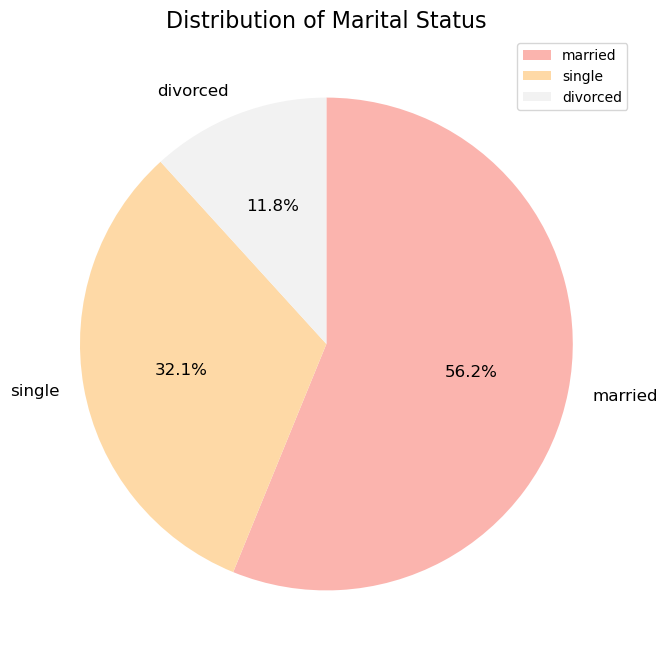

In [8]:
import matplotlib.pyplot as plt

pie_data = new_change.value_counts()

plt.figure(figsize=(8, 8))
pie_data.plot.pie(
    y='count',
    autopct='%1.1f%%',#Displays percentages
    startangle=90,#Rotates the chart for better visual balance
    legend=True,
    fontsize=12,
    figsize=(8, 8),
    counterclock=False,
    colormap='Pastel1' #Gives soft readable colours    
)
plt.title("Distribution of Marital Status", fontsize=16)
plt.ylabel("")  
plt.show()

#### <b> 2.2. Examine the variable "Job". [5pts] 

    a. write a code to combine the categories "admin." and "ADMINISTRATION" for the job column as "admin". replace any occurrence of "ADMINISTRATION" or "admin." with "admin". [5pts]
    b. show the frequency table for the job column before and after the change. 

In [9]:
print("BEFORE CHANGE")
print(customerdemo["job"].value_counts())

#Unified logically identical categories into one standard label.
customerdemo["job"] = customerdemo["job"].replace({"ADMINISTRATION": "admin", "admin.": "admin"})

print("\nAFTER CHANGE")
print(customerdemo["job"].value_counts())


BEFORE CHANGE
,job
,management        2391
,blue-collar       1914
,technician        1768
,admin.            1134
,services           850
,retired            757
,student            375
,self-employed      367
,unemployed         353
,entrepreneur       291
,housemaid          262
,unknown             65
,ADMINISTRATION      51
,Name: count, dtype: int64
,
,AFTER CHANGE
,job
,management       2391
,blue-collar      1914
,technician       1768
,admin            1185
,services          850
,retired           757
,student           375
,self-employed     367
,unemployed        353
,entrepreneur      291
,housemaid         262
,unknown            65
,Name: count, dtype: int64


In [ ]:
'''
replace v/s map
replace:
- Only touches the specific values mentioned, and leaves all the other unchanged.
- Works safely when multiple catagories exist, therefore right ffor fixing specific categories.
map:
- Replaces everything not mentioned with NaN.
- Only return the values that exist in the mapping dictionary.
'''

### <b> 3. Numerical variables [35pts]

##### <b>  3.1. Examine the age variable [10pts]

    a. show the basic statistics for the age variable and the skewness value. use df.colname.skew(). also show the histogram and qq plot for the age variable. is the age variable skewed? [5pts] 
    b. perform a log2 transformation for the age variable. show the histogram and qq plot and skewness value. is the log2 transformation normally distributed? [5pts]

1.008184106102808
,Axes(0.125,0.11;0.775x0.77)


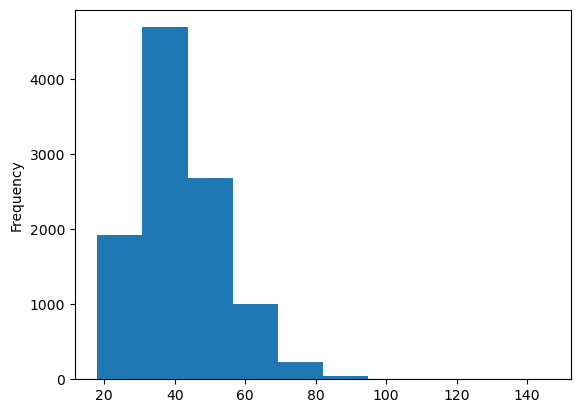

In [10]:
customerdemo['age'].describe()
skew = customerdemo['age'].skew()
print(skew)
print(customerdemo['age'].plot.hist(y='age'))
# Depends on th skewed value approximately 1 --> positively skewed
# The distribution of the histogram is positively skewed( right-skewed) --> the right tail is longer and thinner than the left tail. The peak is mostly on the left handside and the mass of data is on the left
# --> Most of the customers are younge

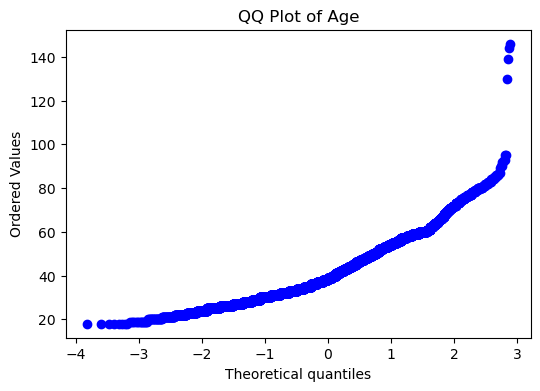

In [11]:
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
stats.probplot(customerdemo['age'], dist="norm", plot=plt)
plt.title('QQ Plot of Age')
plt.show()
# The QQ plot doesnt show the straight line --> not normally distributed
# The overall curved points show right-skewed( postitive skewed) 
# Contains high-end outliers ( only 4 points from 120-140 compare to various main points from <20 to <100) 

Skewness of log2(age): 0.21438373418355325


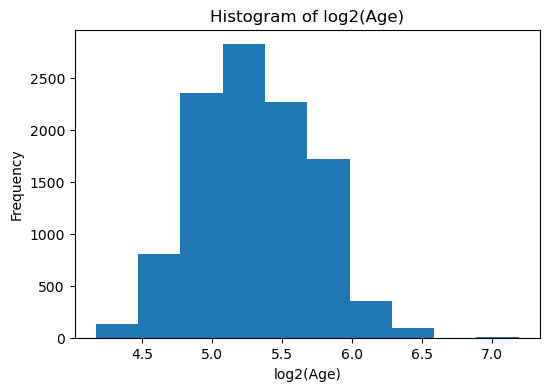

In [12]:
import numpy as np


customerdemo['log2_age'] = np.log2(customerdemo['age'])
log2_age_skew = customerdemo['log2_age'].skew()
print("Skewness of log2(age):", log2_age_skew)

# Histogram
plt.figure(figsize=(6,4))
customerdemo['log2_age'].plot.hist()
plt.title('Histogram of log2(Age)')
plt.xlabel('log2(Age)')
plt.ylabel('Frequency')
plt.show()

#Skewness value of log2(age) is 0.214 nearly 0 --> very slight positive(right skew)
#Compare to the original data of age value --> log2(age) is much more symmetric and bell-shaped
# Skew > 0 --> not normally distributed

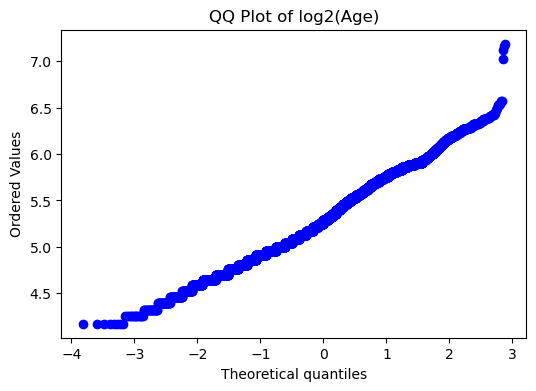

In [13]:
# QQ plot
plt.figure(figsize=(6,4))
stats.probplot(customerdemo['log2_age'], dist="norm", plot=plt)
plt.title('QQ Plot of log2(Age)')
plt.show()
# Reduces outliers compare to the original age value
# Approximately normal --> the vast majority of the points fall very close to the line


In [ ]:
'''
Before transformation:
- the customer base is not very young and not very elderly, mostly middle aged.
- A large portion of the customers are in their prime working and earning years.
- this segmentation of age typically has stable income, are financially active and 
    are most likely to invest or save for long term products
After transformation:
- The distribution becomes much more normal (closer to 0)
- This means our core customer base is middle-aged.
- can be used for better modeling and customer profiling.
'''

##### <b> 3.2. Missing values [10pts]

    a. show the number of missing values for each variable in the bank dataframe. 2pts
    b. show the avg age for each job category. 3pts
    c. add a new column to the dataframe name 'age_imputed' for replacing the missing values under the age columns with the average age given the job. 5pts
    d. show rows with age null for verification. 

In [14]:
#Identifyies the missing values in age column.
#The fills them out with the job specific mean of the age.
#a
bank.isnull().sum()

education       0
customer_id     0
age            20
marital         0
job             0
default         0
balance         0
housing         0
loan            0
dtype: int64

In [15]:
#b
age_job_avg = bank.groupby('job')['age'].mean()
age_job_avg

job
ADMINISTRATION    37.274510
admin.            39.335097
blue-collar       39.691099
entrepreneur      42.448276
housemaid         47.547893
management        40.116709
retired           64.896962
self-employed     39.307902
services          38.504717
student           25.920000
technician        39.416431
unemployed        41.116147
unknown           47.123077
Name: age, dtype: float64

In [16]:
#c
#Basically a dictionary holding the job specific mean age
age_job_mean = bank.groupby('job')['age'].transform('mean')
bank['age_imputed'] = bank['age'].fillna(age_job_mean)
bank
# Using transform because we calculate the mean age value for each job then use it for each rows that commensurate with the rows
# use apply when we want to view the value (apply function on groups, then collapse the value -> only show 1 value for each function)

,education,customer_id,age,marital,job,default,balance,housing,loan,age_imputed
0,secondary,100103,33.0,married,entrepreneur,no,2,yes,yes,33.0
1,tertiary,100106,35.0,married,management,no,231,yes,no,35.0
2,primary,100118,57.0,married,blue-collar,no,52,yes,no,57.0
3,primary,100119,60.0,married,retired,no,60,yes,no,60.0
4,secondary,100121,28.0,married,blue-collar,no,723,yes,yes,28.0
...,...,...,...,...,...,...,...,...,...,...
10573,secondary,145305,73.0,married,retired,no,2850,no,no,73.0
10574,secondary,145306,25.0,single,technician,no,505,no,yes,25.0
10575,tertiary,145307,51.0,married,technician,no,825,no,no,51.0
10576,primary,145308,71.0,divorced,retired,no,1729,no,no,71.0


In [17]:
#d
bank[bank['age'].isnull()]

,education,customer_id,age,marital,job,default,balance,housing,loan,age_imputed
119,tertiary,100898,NaN,married,management,no,305,yes,no,40.116709
592,tertiary,103782,NaN,married,technician,no,94,yes,yes,39.416431
784,primary,104872,NaN,married,blue-collar,no,5,yes,no,39.691099
1383,primary,108581,NaN,married,blue-collar,no,572,yes,yes,39.691099
2129,SECONDARY,112972,NaN,married,technician,no,-241,yes,yes,39.416431
2190,SECONDARY,113317,NaN,divorced,housemaid,no,188,no,no,47.547893
2506,tertiary,114933,NaN,married,blue-collar,no,597,no,no,39.691099
2549,primary,115167,NaN,married,management,no,3760,no,yes,40.116709
2977,SECONDARY,117338,NaN,divorced,services,no,293,yes,yes,38.504717
3989,tertiary,122821,NaN,single,management,no,0,no,no,40.116709


##### <b> 3.3. Outlier detection [10pts] </b>

    a. Show the box plot for the balance variable. 2pts
    b. print the upper and lower fence of outlier detection for the balance variable and show rows that are outliers. [3pts] 
    c. remove the outliers for the balance variable. [5pts] 
    

<Axes: >

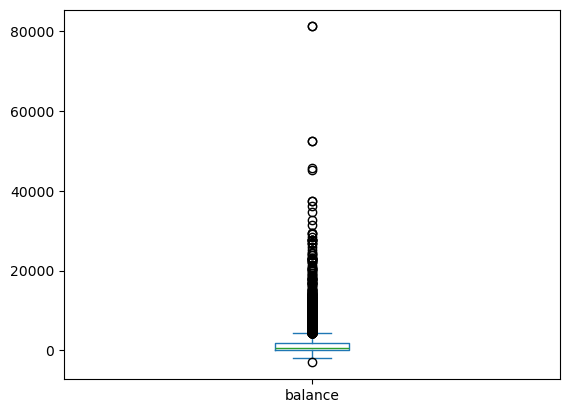

In [18]:
#a
customerbanking.plot.box(y='balance')
#Extremely skew --> the median horizontal line is almost at 0 
#The entire box  is located near the bottom of the y-axis 
#--> This indicates that the vast majority of the balance values are clustered near zero or are slightly positive, with the distribution trailing off dramatically to the right (positive values)
# -->This is a classic sign of strong positive (right) skewness.

# Whiskers: The upper whisker is barely visible above the box before the outliers begin.
#These circles represent data points that are significantly higher than the main body of the data, which confirms the presence of numerous and extreme high-value outliers.

In [19]:
Q1 = customerbanking['balance'].quantile(0.25)
Q3 = customerbanking['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")

outliers = customerbanking[
    (customerbanking['balance'] < lower_fence) | 
    (customerbanking['balance'] > upper_fence)
]

print("\nOUTLIERS:")
outliers

Q1: 125.0
,Q3: 1765.0
,IQR: 1640.0
,Lower Fence: -2335.0
,Upper Fence: 4225.0
,
,OUTLIERS:


,customer_id,default,balance,housing,loan
10,111335,no,7419,yes,no
29,120747,no,11431,no,no
33,126966,no,4580,yes,no
48,119890,no,5204,no,no
57,109242,no,4320,yes,no
...,...,...,...,...,...
10532,138829,no,6542,yes,no
10536,140777,no,5539,no,no
10540,144652,no,5275,no,no
10543,136398,no,5293,yes,no


In [20]:
removed_outliers = customerbanking[
    (customerbanking['balance'] >= lower_fence) &
    (customerbanking['balance'] <= upper_fence)
]

print("\nData after removing outliers")
removed_outliers


,Data after removing outliers


,customer_id,default,balance,housing,loan
0,122482,no,347,no,no
1,119725,no,3462,no,no
2,103490,no,157,yes,no
3,126218,no,3689,yes,no
4,104835,no,0,yes,yes
...,...,...,...,...,...
10573,131307,no,52,yes,no
10574,100992,no,-291,yes,yes
10575,141415,no,539,yes,no
10576,140970,no,3850,yes,no


In [ ]:
'''
Quick summary of the outcome:
Outlier detection shows that a small group of customers have unusually high account balances, identifying 
them as high-value clients. This helps the business separate premium customers for specialized offers while
keeping general marketing decisions focused on the typical customer profile.
'''

#### <b> 3.4. Variable correlation study [5pts]

##### <b>  Balance and loan. 

    a. create an equal sized binning for the balance variable. show the freq table. then show the cross table between balance and loan. perform the chi-2 test. [2pts] 
    b. interpret the cross table and the chi-2 value. do people with loan have a positive balance? is there a relationship between the two variables? [3pts]
    

In [21]:
q = [0,.25,.5,.75,1]
customerbanking_binned = pd.qcut(customerbanking['balance'], q=q, duplicates = 'drop', labels = ['Q1(lowest)', 'Q2', 'Q3', 'Q4(highest)'])

#Frequency table
print(customerbanking_binned.value_counts())

#Crosstable
print('-------------------------------------------------------------------------')
cross_table = pd.crosstab(customerbanking_binned,customerbanking['loan'])
print(cross_table)

#Chi-2
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(cross_table)
print(f'Chi2: {chi2}')
print(f'dof: {dof}')
print(f'p: {p}')
    

balance
,Q1(lowest)     2647
,Q2             2644
,Q3             2644
,Q4(highest)    2643
,Name: count, dtype: int64
,-------------------------------------------------------------------------
,loan           no  yes
,balance               
,Q1(lowest)   2120  527
,Q2           2277  367
,Q3           2358  286
,Q4(highest)  2455  188
,Chi2: 206.53698474401102
,dof: 3
,p: 1.631511983467256e-44


In [ ]:
'''
Interpretation:
The crosstab shows that the proportion of customers with a loan decreases steadily as balance moves 
from the lowest quartile (Q1) to the highest quartile (Q4). Q1 has 527 loan cases, while Q4 has only 188, despite 
similar group sizes. This indicates that customers with lower balances are more likely to have a loan, whereas 
those with higher balances are less likely to have one.

The chi-square test (X² = 206.54, p = 1.63e-44) is highly significant (p < 0.05), so we reject the null 
hypothesis. This confirms a statistically significant association between balance category and loan status. 
Therefore, loan status is not independent of balance level—there is a clear relationship between the two variables.
'''

### <b> 4. apply, split-apply-combine [35pts] 

##### <b> 4.1. add dummy variables [5pts]

 add a new column named primary that takes the value 1 if education value is 'primary' and 0 otherwise. [5pts] use apply and lambda to create this new column


In [22]:
customerdemo['primary']=customerdemo.apply(lambda row: 1 if (row['education']=='primary') else 0,axis=1)
customerdemo

,education,customer_id,age,marital,job,log2_age,primary
0,secondary,100103,33.0,married,entrepreneur,5.044394,0
1,tertiary,100106,35.0,married,management,5.129283,0
2,primary,100118,57.0,married,blue-collar,5.832890,1
3,primary,100119,60.0,married,retired,5.906891,1
4,secondary,100121,28.0,married,blue-collar,4.807355,0
...,...,...,...,...,...,...,...
10573,secondary,145305,73.0,married,retired,6.189825,0
10574,secondary,145306,25.0,single,technician,4.643856,0
10575,tertiary,145307,51.0,married,technician,5.672425,0
10576,primary,145308,71.0,divorced,retired,6.149747,1


##### <b> 4.2. apply functions [10pts]

    a. define a function named custom_binning that is defined with x, th1 and th2 and assigns <=th1 if the value x is less than or equal th1, [th1 th2] if the value x falls in the [th1 th2] bin and >=th2 if the value of x is greater than or equal th2. 5pts 
    b. apply the function on age with th1=30, th2=50. Show the frequency table. 5pts

In [23]:
def custom_binning(x,th1,th2):
    if x <= th1:
        return f"<= {th1}"
    elif th1 < x< th2:
        return f'[{th1}, {th2}]'
    else:
        return f">= {th2}"

In [24]:
customerdemo['age_bin']= customerdemo['age'].apply(lambda x: custom_binning(x,30,50))
freq_table = customerdemo['age_bin'].value_counts()
freq_table

age_bin
[30, 50]    6098
>= 50       2562
<= 30       1918
Name: count, dtype: int64

##### <b> 4.3. vectorizing functions [10pts]
    a. define a vectorized function with housing, loan and education vectors. The function returns a score that accumulates points based on loan, housing and education. [5pts] 
    The score increments as follows: 
    if housing is yes, the score adds by 1. 
    if loan is no, the score adds by 1. 
    if education is tertiary, the score increments by 1.   
    b. call the functions with housing, loan and education from bank dataframe. add risk column to the dataframe and show the frequency table. [5pts] 
    
    

In [27]:
import numpy as np
def risk_score(housing,loan,education):
    score = np.zeros(len(housing),dtype=int) #Creates a new array filled with zeros. #len(housing) --> Calculates how many rows (customers) are in the data so the new array matches that size. #dtype=int: Ensures the scores are treated as whole numbers (integers), not decimals.
    score += np.where(housing == 'yes',1,0)
    score += np.where(loan == 'no',1,0)
    score += np.where(education =='tertiary',1,0)
    return score

In [28]:
bank['risk'] = risk_score(bank['housing'],bank['loan'],bank['education'])
bank['risk'].value_counts()

risk
2    5151
1    3813
3    1193
0     421
Name: count, dtype: int64

##### <b> 4.4. Aggregation [10pts]
    a. use agg() function after grouping by housing to calculate the median age, the mean balance. 5pts  
    b. use transform() function after grouping by housing to standardize the balance per each group. save into a new column named: balance_grpZ. call describe() on the new balance_grpZ column. [5pts]
    

In [29]:
agg_median_age = bank.groupby('housing')['age'].agg(np.median)
agg_mean_balance = bank.groupby('housing')['balance'].agg(np.mean)
print(agg_median_age)
print(agg_mean_balance)

housing
,no     41.0
,yes    37.0
,Name: age, dtype: float64
,housing
,no     1796.684939
,yes    1273.153769
,Name: balance, dtype: float64


C:\Users\rrdas\AppData\Local\Temp\ipykernel_30068\2169904829.py:1: FutureWarning: The provided callable <function median at 0x000001D5241E37E0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
,  agg_median_age = bank.groupby('housing')['age'].agg(np.median)
,C:\Users\rrdas\AppData\Local\Temp\ipykernel_30068\2169904829.py:2: FutureWarning: The provided callable <function mean at 0x000001D52407C2C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
,  agg_mean_balance = bank.groupby('housing')['balance'].agg(np.mean)


In [30]:
bank['balance_grpZ'] = bank.groupby('housing')['balance'].transform(lambda x: (x-x.mean())/x.std())
bank['balance_grpZ'].describe()

count    1.057800e+04
mean     2.686870e-18
std      9.999527e-01
min     -1.670476e+00
25%     -4.607507e-01
50%     -3.159644e-01
75%      6.859324e-02
max      2.250850e+01
Name: balance_grpZ, dtype: float64

In [ ]:
'''
Through the apply functions, custom binning, risk scoring, and group-by analysis, we transformed raw 
customer data into actionable customer segments.
These actions help the marketing team segment customerrs by age, education, financial profile, and 
behavioral patterns, allowing the bank to design highly targeted, personalized, and more effective
marketing campaigns.
'''